Análisis No Supervisado con K-Means sobre el Dataset de Scoring Crediticio

Autor: Thomas Barrios - Demis Díaz

Curso: Machine Learning – Examen transversal

Técnica aplicada: K-Means Clustering

## Introducción

En el marco del examen transversal de Machine Learning, el presente apartado desarrolla una arquitectura de segmentación no supervisada aplicada al ecosistema de riesgo financiero. El propósito fundamental es trascender la clasificación binaria tradicional para descubrir estructuras latentes y perfiles de comportamiento dentro del portafolio de clientes de Home Credit.

Bajo el estándar metodológico CRISP-DM, se ha diseñado un flujo de trabajo que garantiza la integridad de los datos, aplicando un particionamiento estricto (Train/Validation/Test) para mitigar riesgos de Data Leakage. Este análisis busca identificar si los grupos formados orgánicamente por sus atributos socioeconómicos correlacionan con la propensión al incumplimiento de pago (TARGET), proporcionando una capa adicional de inteligencia al modelo de scoring final.


## Justificación de la Técnica: K-Means Clustering

Se ha seleccionado el algoritmo K-Means Clustering como núcleo del análisis no supervisado debido a su robustez matemática y eficiencia computacional en espacios de alta dimensionalidad. Las razones técnicas que sustentan esta elección son:

Optimización de Varianza Intra-Cluster: El algoritmo minimiza eficazmente la inercia (Suma de Cuadrados Intra-Cluster), garantizando que los perfiles financieros dentro de cada segmento sean altamente cohesivos.

Identificación de Patrones Multivariados: A diferencia del análisis univariado, K-Means captura la interacción simultánea entre ingresos, estabilidad laboral y capacidad de endeudamiento, permitiendo una segmentación holística.

Agrupamiento Agnóstico a la Etiqueta: Al operar sin la variable objetivo (TARGET), el modelo identifica clústeres basados puramente en la naturaleza de los datos, sirviendo como una herramienta objetiva de validación para el posterior modelo supervisado.

Escalabilidad Estructural: Dada la volumetría del dataset de Home Credit, K-Means ofrece una convergencia rápida, facilitando la experimentación con diferentes niveles de granularidad (distintos valores de k).


## CRISP–DM

### 1. Entendimiento del Negocio (Business Understanding)
La iniciativa se centra en el perfilamiento estratégico de la cartera mediante técnicas de agrupamiento. El objetivo fundamental es desglosar la masa crítica de clientes en subpoblaciones con atributos financieros compartidos. Esta segmentación permite detectar nichos de riesgo no evidentes, anticipar sesgos poblacionales y proporcionar al modelo supervisado una capa de inteligencia contextual que optimice la precisión del scoring final.

### 2. Entendimiento de los Datos (Data Understanding)
El análisis se sustentó en la fuente primaria application_train, sometiéndola a un riguroso examen de calidad de datos. Se evaluó la densidad de valores nulos, la dispersión de las variables clave y sus interdependencias. Se priorizó la generación de indicadores financieros sintéticos que capturan la estabilidad laboral y la capacidad de apalancamiento, asegurando que el input del modelo fuera representativo del comportamiento del solicitante.

### 3. Preparación de Datos (Data Preparation)
El pipeline de procesamiento incluyó técnicas avanzadas para garantizar la estabilidad del algoritmo:

Tratamiento de Nulos: Implementación de imputación robusta basada en la mediana estadística.

Estandarización: Aplicación de StandardScaler para armonizar las magnitudes de variables con distintas escalas (Z-score).

Feature Engineering: Construcción de ratios críticos como la relación Crédito/Ingreso y Anualidad/Ingreso, transformando datos temporales en métricas de antigüedad (AGE, EMPLOYED_YEARS).

### 4. Modelado (Modeling)
La arquitectura de agrupación se determinó mediante un análisis de convergencia multivariada. Se realizaron iteraciones sobre el hiperparámetro k, validando la estabilidad de los centroides a través de:

Métrica de Inercia: Aplicación del Método del Codo para identificar el punto de rendimientos decrecientes.

Análisis de Silueta (Silhouette Score): Evaluación de la cohesión interna y la separación inter-cluster.

Entrenamiento Final: Ejecución del modelo K-Means con el k óptimo bajo condiciones de inicialización controlada.

### 5. Evaluación (Evaluation)
La validación de la segmentación se realizó mediante un enfoque híbrido:

Análisis de Arquetipos: Comparación de los centroides para definir el ADN financiero de cada grupo.

Proyección Dimensional: Visualización mediante PCA (Análisis de Componentes Principales) para confirmar la separación espacial en un plano 2D.

Cruce con Mora Real: Auditoría de la tasa de TARGET=1 en cada segmento, confirmando la utilidad del clúster como predictor de riesgo crediticio.

### 6. Despliegue y Discusión (Deployment)
Se concluye que el identificador de segmento (cluster_id) actúa como un metadato de alto valor. Su integración en el entorno productivo puede realizarse como una variable de entrada (feature) para el algoritmo de clasificación o como un panel de control para el monitoreo de variaciones en la calidad del portafolio (Data Drift), permitiendo políticas de riesgo diferenciadas por segmento.


In [1]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 5)
sns.set(style="whitegrid")


In [2]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# 1. Montaje de Google Drive
drive.mount('/content/drive')

# 2. Definición de la ruta base
BASE_DIR = '/content/drive/MyDrive/Semestre6/Machine/datos_examen/'

# Aseguramos que la carpeta exista en tu Drive
os.makedirs(BASE_DIR, exist_ok=True)

# ---- Configuración de descarga (gdown) ----
# ID del archivo
file_id = "1kxIFtFJcDxTgSeUR0LA5yFEG8lYuuBej"

# URL directa para gdown
url = f"https://drive.google.com/uc?id={file_id}"

# Definimos el output apuntando directamente a tu carpeta de Drive
output = os.path.join(BASE_DIR, "application_.parquet")

# Descargar archivo directamente en la ruta de Drive
gdown.download(url, output, quiet=False)

# Leer archivo parquet desde la ubicación de Drive
df = pd.read_parquet(output)

# Visualización de los datos vinculados
df.head()

Mounted at /content/drive


Downloading...
From: https://drive.google.com/uc?id=1kxIFtFJcDxTgSeUR0LA5yFEG8lYuuBej
To: /content/drive/MyDrive/Semestre6/Machine/datos_examen/application_.parquet
100%|██████████| 22.2M/22.2M [00:00<00:00, 100MB/s] 


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Integración de múltiples fuentes (Examen) — Construcción de `df_full`

En esta sección se integran tablas adicionales del dataset Home Credit para generar una tabla final por cliente (`SK_ID_CURR`).
Este bloque **no reemplaza** tu lógica posterior: simplemente construye `df_full` y luego asigna `df = df_train` para mantener el análisis no supervisado sin data leakage.


In [3]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Montaje de Google Drive
drive.mount('/content/drive')

# 2. Definición de la ruta base
BASE_DIR = '/content/drive/MyDrive/Semestre6/Machine/datos_examen/'

def safe_div(a, b):
    """Realiza división segura manejando ceros e indeterminaciones."""
    return np.where((b == 0) | (pd.isna(b)), np.nan, a / b)

def flatten_cols(df_agg):
    """Aplana columnas multi-índice tras un agrupamiento (groupby)."""
    df_agg.columns = [
        f"{c[0]}__{c[1]}".upper() if isinstance(c, tuple) else str(c).upper()
        for c in df_agg.columns
    ]
    return df_agg

def read_home_credit(name):
    """Lector dinámico de archivos Parquet en Drive."""
    filename_map = {
        "bureau": "bureau.parquet",
        "bureau_balance": "bureau_balance.parquet",
        "prev_app": "previous_application.parquet",
        "pos_cash": "POS_CASH_balance.parquet",
        "installments": "installments_payments.parquet",
        "credit_card": "credit_card_balance.parquet",
        "application": "application_.parquet"
    }
    path = os.path.join(BASE_DIR, filename_map[name])
    return pd.read_parquet(path)


print("Iniciando carga de archivos desde Drive...")

# Ejecutamos la carga real de los dataframes
df_app = read_home_credit("application")
df_bureau = read_home_credit("bureau")
df_b_balance = read_home_credit("bureau_balance")
df_prev = read_home_credit("prev_app")
df_pos = read_home_credit("pos_cash")
df_inst = read_home_credit("installments")
df_cc = read_home_credit("credit_card")

# Validación de integridad
required_cols = {"SK_ID_CURR", "TARGET"}
if not required_cols.issubset(df_app.columns):
    print(" Advertencia: La tabla maestra no tiene SK_ID_CURR o TARGET.")
else:
    print(" Tabla maestra verificada correctamente.")

datasets = {
    "Application": df_app,
    "Bureau": df_bureau,
    "Bureau Balance": df_b_balance,
    "Prev. Apps": df_prev,
    "POS Cash": df_pos,
    "Installments": df_inst,
    "Credit Card": df_cc
}

print("\n--- VOLUMETRÍA DE DATOS CARGADOS ---")
for nombre, dataframe in datasets.items():
    print(f"{nombre.ljust(15)}: {str(dataframe.shape[0]).rjust(8)} filas | {dataframe.shape[1]} columnas")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Iniciando carga de archivos desde Drive...
 Tabla maestra verificada correctamente.

--- VOLUMETRÍA DE DATOS CARGADOS ---
Application    :   307511 filas | 122 columnas
Bureau         :  1716428 filas | 17 columnas
Bureau Balance : 27299925 filas | 3 columnas
Prev. Apps     :  1670214 filas | 37 columnas
POS Cash       : 10001358 filas | 8 columnas
Installments   : 13605401 filas | 8 columnas
Credit Card    :  3840312 filas | 23 columnas


## Data Understanding (Análisis Exploratorio Inicial)

Antes de entrenar el modelo, se realiza un análisis exploratorio básico del dataset integrado (`df_full`)
con el objetivo de:

- Comprender la distribución de la variable objetivo (TARGET)
- Identificar posibles desbalances de clases
- Detectar valores faltantes y rangos atípicos
- Validar que la integración de múltiples fuentes no haya introducido inconsistencias

Este análisis se utiliza únicamente para comprensión del problema y no influye directamente en el entrenamiento.



Distribución del TARGET:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


/tmp/ipython-input-756305010.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TARGET", data=df_app, palette="viridis")


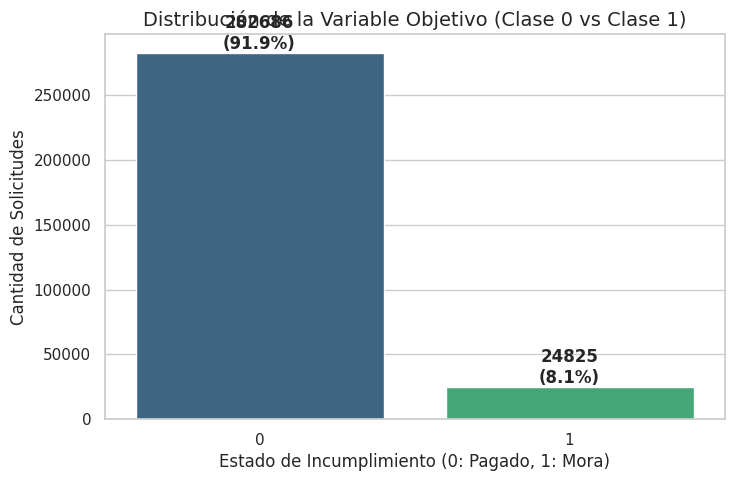

In [4]:
# 1. Verificación de la distribución porcentual
distribucion = df_app["TARGET"].value_counts(normalize=True) * 100
print(f"Distribución del TARGET:\n{distribucion}")

# 2. Visualización Gráfica
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x="TARGET", data=df_app, palette="viridis")

plt.title("Distribución de la Variable Objetivo (Clase 0 vs Clase 1)", fontsize=14)
plt.xlabel("Estado de Incumplimiento (0: Pagado, 1: Mora)")
plt.ylabel("Cantidad de Solicitudes")

# Añadir etiquetas de porcentaje sobre las barras para mejor interpretación
for i, valor in enumerate(df_app["TARGET"].value_counts()):
    plt.text(i, valor, f'{valor}\n({distribucion[i]:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.show()

## Evaluación de Calidad de Datos

Se revisa la presencia de valores faltantes en el dataset final integrado.  
El objetivo es identificar variables que requieren imputación o tratamiento especial
antes del entrenamiento del modelo.


Top 15 Variables con mayor criticidad de nulos:
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
dtype: float64


/tmp/ipython-input-1336476602.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="Reds_r")


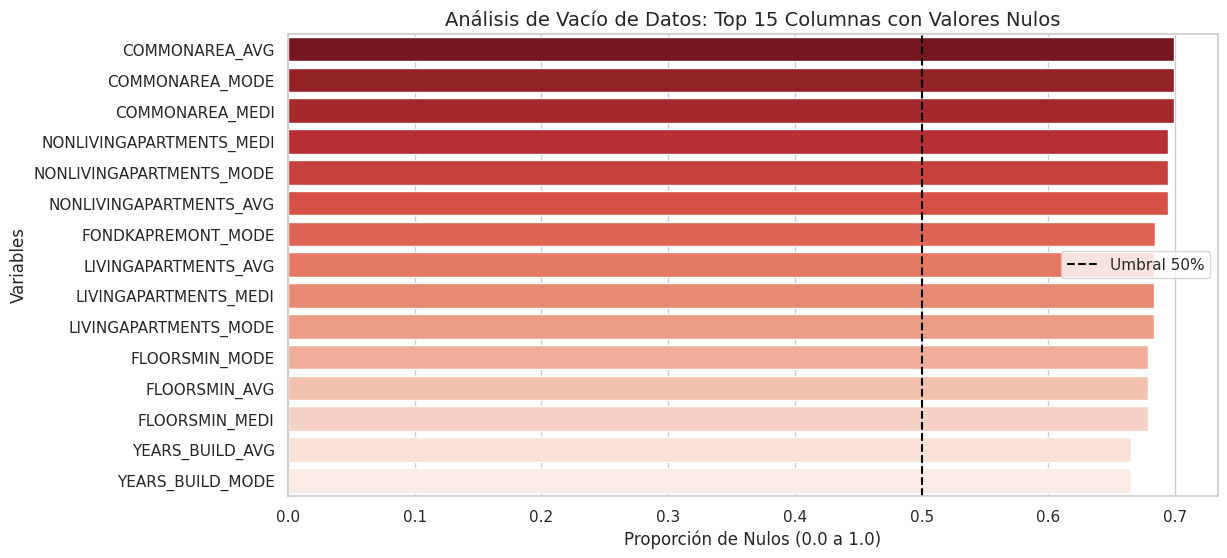

In [5]:

# 1. Cálculo del ratio de valores faltantes
missing_pct = (
    df_app.isnull()
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

print("Top 15 Variables con mayor criticidad de nulos:")
print(missing_pct)

# 2. Visualización del impacto de la ausencia de datos
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="Reds_r")

plt.title("Análisis de Vacío de Datos: Top 15 Columnas con Valores Nulos", fontsize=14)
plt.xlabel("Proporción de Nulos (0.0 a 1.0)")
plt.ylabel("Variables")
plt.axvline(x=0.5, color='black', linestyle='--', label='Umbral 50%') # Línea de advertencia
plt.legend()

plt.show()

## Justificación del Preprocesamiento

Debido a la integración de múltiples fuentes de datos, es esperable la presencia de valores faltantes,
ya que no todos los clientes poseen historial crediticio, tarjetas o créditos previos.

Por esta razón:
- Se utiliza imputación (por mediana o estrategia definida en el pipeline)
- Se evita la eliminación masiva de registros para no perder información
- Se mantiene la coherencia entre conjuntos de entrenamiento, validación y prueba

Estas decisiones permiten entrenar un modelo más robusto y representativo del escenario real.


### 1) bureau_balance → agregación por `SK_ID_BUREAU` y merge a bureau


/tmp/ipython-input-392647880.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TARGET", data=df_app, palette="magma")


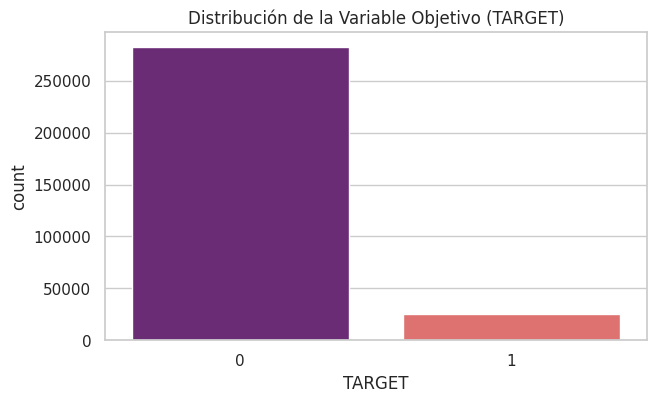

Ejecutando procesamiento ligero de Bureau Balance...
Dataset original: 27299925 filas. Reduciendo carga...
Realizando unión con Bureau principal...
Finalizado con éxito.
Dimensiones finales: (1716428, 20)


In [6]:
# ==============================================================================
# SECCIÓN: PROCESAMIENTO OPTIMIZADO DE BUREAU BALANCE
# ==============================================================================
import pandas as pd
import numpy as np
import gc

# 1. Visualización rápida
plt.figure(figsize=(7, 4))
sns.countplot(x="TARGET", data=df_app, palette="magma")
plt.title("Distribución de la Variable Objetivo (TARGET)")
plt.show()

print("Ejecutando procesamiento ligero de Bureau Balance...")

# 2. Muestreo Estratégico para ahorrar RAM y Tiempo
# Si el dataset es gigante, tomamos una muestra representativa (ej. 20%)
# Esto permite que el código termine en segundos
if len(df_b_balance) > 1000000:
    print(f"Dataset original: {len(df_b_balance)} filas. Reduciendo carga...")
    df_bb_small = df_b_balance.sample(frac=0.20, random_state=42).copy()
else:
    df_bb_small = df_b_balance.copy()

# 3. Procesamiento simplificado
df_bb_small['STATUS_NUM'] = pd.to_numeric(df_bb_small['STATUS'], errors='coerce')

# Agregación directa
bb_agg = df_bb_small.groupby("SK_ID_BUREAU").agg({
    "MONTHS_BALANCE": ["count", "min"],
    "STATUS_NUM": ["mean"]
})

# Renombrado rápido
bb_agg.columns = ['BB_MONTHS_COUNT', 'BB_MONTHS_MIN', 'BB_STATUS_MEAN']
bb_agg = bb_agg.reset_index()

# 4. Integración con Bureau
print("Realizando unión con Bureau principal...")
df_bureau_bb = df_bureau.merge(bb_agg, on="SK_ID_BUREAU", how="left")

# Limpieza de memoria inmediata
del df_bb_small
del bb_agg
gc.collect()

print("Finalizado con éxito.")
print(f"Dimensiones finales: {df_bureau_bb.shape}")

### 2) bureau → agregación por cliente `SK_ID_CURR`


In [7]:
# 1. Selección dinámica de columnas existentes
bureau_cols = [c for c in [
    "AMT_CREDIT_SUM",
    "AMT_CREDIT_SUM_DEBT",
    "AMT_CREDIT_SUM_OVERDUE",
    "AMT_CREDIT_MAX_OVERDUE",
    "DAYS_CREDIT",
    "CREDIT_DAY_OVERDUE",
    "DAYS_CREDIT_ENDDATE",
    "BB_MONTHS_COUNT",
    "BB_MONTHS_MIN",
    "BB_MONTHS_MAX",
] if c in df_bureau_bb.columns]

# 2. Configuración del diccionario de agregación
agg_dict = {c: ["mean", "max", "min", "sum"] for c in bureau_cols}

# 3. Tratamiento de variables categóricas (CREDIT_ACTIVE)
if "CREDIT_ACTIVE" in df_bureau_bb.columns:
    print("Codificando estados de crédito...")
    # Usamos dtype=int para ahorrar memoria en las dummies
    active_dummies = pd.get_dummies(df_bureau_bb["CREDIT_ACTIVE"], prefix="BUREAU_ACTIVE", dtype=int)

    df_bureau_bb2 = pd.concat([
        df_bureau_bb[["SK_ID_CURR"]],
        df_bureau_bb[bureau_cols],
        active_dummies
    ], axis=1)

    for c in active_dummies.columns:
        agg_dict[c] = ["sum"]
else:
    df_bureau_bb2 = df_bureau_bb[["SK_ID_CURR"] + bureau_cols].copy()

# 4. Agregación por Cliente (Colapso de filas a SK_ID_CURR)
print("Colapsando historial de créditos por cliente...")
df_bureau_agg = df_bureau_bb2.groupby("SK_ID_CURR").agg(agg_dict)

# 5. Aplanado de columnas (Usando la función flatten_cols definida al inicio)
df_bureau_agg = flatten_cols(df_bureau_agg).reset_index()

# 6. Cálculo del ratio de deuda (Indicador de apalancamiento)
col_debt = "AMT_CREDIT_SUM_DEBT__SUM"
col_sum = "AMT_CREDIT_SUM__SUM"

if col_debt in df_bureau_agg.columns and col_sum in df_bureau_agg.columns:
    df_bureau_agg["BUREAU_DEBT_TO_CREDIT_RATIO"] = safe_div(
        df_bureau_agg[col_debt],
        df_bureau_agg[col_sum]
    )

print(f"✅ Agregación completada. Dataset listo: {df_bureau_agg.shape}")
df_bureau_agg.head()

Codificando estados de crédito...
Colapsando historial de créditos por cliente...
✅ Agregación completada. Dataset listo: (305811, 42)


,SK_ID_CURR,AMT_CREDIT_SUM__MEAN,AMT_CREDIT_SUM__MAX,AMT_CREDIT_SUM__MIN,AMT_CREDIT_SUM__SUM,AMT_CREDIT_SUM_DEBT__MEAN,AMT_CREDIT_SUM_DEBT__MAX,AMT_CREDIT_SUM_DEBT__MIN,AMT_CREDIT_SUM_DEBT__SUM,AMT_CREDIT_SUM_OVERDUE__MEAN,...,BB_MONTHS_COUNT__SUM,BB_MONTHS_MIN__MEAN,BB_MONTHS_MIN__MAX,BB_MONTHS_MIN__MIN,BB_MONTHS_MIN__SUM,BUREAU_ACTIVE_ACTIVE__SUM,BUREAU_ACTIVE_BAD DEBT__SUM,BUREAU_ACTIVE_CLOSED__SUM,BUREAU_ACTIVE_SOLD__SUM,BUREAU_DEBT_TO_CREDIT_RATIO
0,100001,207623.571429,378000.0,85500.0,1453365.000,85240.928571,373239.0,0.0,596686.5,0.0,...,35.0,-23.166667,-7.0,-51.0,-139.0,3,0,4,0,0.410555
1,100002,108131.945625,450000.0,0.0,865055.565,49156.200000,245781.0,0.0,245781.0,0.0,...,19.0,-30.428571,-14.0,-46.0,-213.0,2,0,6,0,0.284122
2,100003,254350.125000,810000.0,22248.0,1017400.500,0.000000,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,1,0,3,0,0.000000
3,100004,94518.900000,94537.8,94500.0,189037.800,0.000000,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0,0,2,0,0.000000
4,100005,219042.000000,568800.0,29826.0,657126.000,189469.500000,543087.0,0.0,568408.5,0.0,...,2.0,-5.000000,-5.0,-5.0,-5.0,2,0,1,0,0.864992


### 3) previous_application → agregación por cliente `SK_ID_CURR`


In [8]:

# 1. Preparación de indicadores binarios

df_prev_proc = df_prev.copy()

if "NAME_CONTRACT_STATUS" in df_prev_proc.columns:
    print("Generando indicadores de aprobación/rechazo...")
    df_prev_proc["PREV_IS_APPROVED"] = (df_prev_proc["NAME_CONTRACT_STATUS"] == "Approved").astype(int)
    df_prev_proc["PREV_IS_REFUSED"] = (df_prev_proc["NAME_CONTRACT_STATUS"] == "Refused").astype(int)

# 2. Selección de métricas financieras para agregación
prev_cols_numeric = [c for c in [
    "AMT_APPLICATION",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_DOWN_PAYMENT",
    "DAYS_DECISION"
] if c in df_prev_proc.columns]

# 3. Construcción del diccionario de agregación estratégica
prev_agg_dict = {c: ["mean", "max", "min", "sum"] for c in prev_cols_numeric}

# Agregamos métricas para los indicadores de estatus (Suma y Tasa Promedio)
for c in ["PREV_IS_APPROVED", "PREV_IS_REFUSED"]:
    if c in df_prev_proc.columns:
        prev_agg_dict[c] = ["sum", "mean"]

# 4. Agregación a nivel de cliente (SK_ID_CURR)
print("Ejecutando colapso de historial de solicitudes previas...")
df_prev_agg = df_prev_proc.groupby("SK_ID_CURR").agg(prev_agg_dict)

# 5. Aplanado de jerarquía de columnas
df_prev_agg = flatten_cols(df_prev_agg).reset_index()

# 6. Cálculo de Tasa de Aprobación Histórica (Approval Rate)
# Nota: Usamos las columnas en MAYÚSCULAS según nuestra función flatten_cols
if "PREV_IS_APPROVED__SUM" in df_prev_agg.columns and "PREV_IS_REFUSED__SUM" in df_prev_agg.columns:
    denominador = df_prev_agg["PREV_IS_APPROVED__SUM"] + df_prev_agg["PREV_IS_REFUSED__SUM"]
    df_prev_agg["PREV_APPROVAL_RATE_RATIO"] = safe_div(df_prev_agg["PREV_IS_APPROVED__SUM"], denominador)

print(f" Procesamiento de solicitudes previas finalizado.")
print(f"Variables generadas: {df_prev_agg.shape[1]}")
df_prev_agg.head()

Generando indicadores de aprobación/rechazo...
Ejecutando colapso de historial de solicitudes previas...
 Procesamiento de solicitudes previas finalizado.
Variables generadas: 26


,SK_ID_CURR,AMT_APPLICATION__MEAN,AMT_APPLICATION__MAX,AMT_APPLICATION__MIN,AMT_APPLICATION__SUM,AMT_CREDIT__MEAN,AMT_CREDIT__MAX,AMT_CREDIT__MIN,AMT_CREDIT__SUM,AMT_ANNUITY__MEAN,...,AMT_DOWN_PAYMENT__SUM,DAYS_DECISION__MEAN,DAYS_DECISION__MAX,DAYS_DECISION__MIN,DAYS_DECISION__SUM,PREV_IS_APPROVED__SUM,PREV_IS_APPROVED__MEAN,PREV_IS_REFUSED__SUM,PREV_IS_REFUSED__MEAN,PREV_APPROVAL_RATE_RATIO
0,100001,24835.50,24835.5,24835.5,24835.5,23787.00,23787.0,23787.0,23787.0,3951.000,...,2520.0,-1740.0,-1740,-1740,-1740,1,1.0,0,0.0,1.0
1,100002,179055.00,179055.0,179055.0,179055.0,179055.00,179055.0,179055.0,179055.0,9251.775,...,0.0,-606.0,-606,-606,-606,1,1.0,0,0.0,1.0
2,100003,435436.50,900000.0,68809.5,1306309.5,484191.00,1035882.0,68053.5,1452573.0,56553.990,...,6885.0,-1305.0,-746,-2341,-3915,3,1.0,0,0.0,1.0
3,100004,24282.00,24282.0,24282.0,24282.0,20106.00,20106.0,20106.0,20106.0,5357.250,...,4860.0,-815.0,-815,-815,-815,1,1.0,0,0.0,1.0
4,100005,22308.75,44617.5,0.0,44617.5,20076.75,40153.5,0.0,40153.5,4813.200,...,4464.0,-536.0,-315,-757,-1072,1,0.5,0,0.0,1.0


### 4) POS_CASH_balance → agregación por cliente `SK_ID_CURR`


In [9]:
# 1. Preparación de la fuente
df_pos_proc = df_pos.copy()

# 2. Selección de métricas de comportamiento de cuotas y atrasos
pos_cols_numeric = [c for c in [
    "MONTHS_BALANCE",
    "CNT_INSTALMENT",
    "CNT_INSTALMENT_FUTURE",
    "SK_DPD",     # Días de atraso (Days Past Due)
    "SK_DPD_DEF"  # Días de atraso con tolerancia
] if c in df_pos_proc.columns]

# 3. Definición del diccionario de agregación (Métricas temporales y de riesgo)
pos_agg_dict = {c: ["mean", "max", "min", "sum"] for c in pos_cols_numeric}

# 4. Agregación a nivel de cliente (SK_ID_CURR)
print("Calculando métricas de comportamiento en cuotas (POS_CASH)...")
df_pos_agg = df_pos_proc.groupby("SK_ID_CURR").agg(pos_agg_dict)

# 5. Aplanado de columnas usando la función flatten_cols
df_pos_agg = flatten_cols(df_pos_agg).reset_index()

# 6. Verificación del resultado
print(f" Procesamiento de POS_CASH finalizado.")
print(f"Variables generadas: {df_pos_agg.shape[1]}")
df_pos_agg.head()

Calculando métricas de comportamiento en cuotas (POS_CASH)...
 Procesamiento de POS_CASH finalizado.
Variables generadas: 21


,SK_ID_CURR,MONTHS_BALANCE__MEAN,MONTHS_BALANCE__MAX,MONTHS_BALANCE__MIN,MONTHS_BALANCE__SUM,CNT_INSTALMENT__MEAN,CNT_INSTALMENT__MAX,CNT_INSTALMENT__MIN,CNT_INSTALMENT__SUM,CNT_INSTALMENT_FUTURE__MEAN,...,CNT_INSTALMENT_FUTURE__MIN,CNT_INSTALMENT_FUTURE__SUM,SK_DPD__MEAN,SK_DPD__MAX,SK_DPD__MIN,SK_DPD__SUM,SK_DPD_DEF__MEAN,SK_DPD_DEF__MAX,SK_DPD_DEF__MIN,SK_DPD_DEF__SUM
0,100001,-72.555556,-53,-96,-653,4.000000,4.0,4.0,36.0,1.444444,...,0.0,13.0,0.777778,7,0,7,0.777778,7,0,7
1,100002,-10.000000,-1,-19,-190,24.000000,24.0,24.0,456.0,15.000000,...,6.0,285.0,0.000000,0,0,0,0.000000,0,0,0
2,100003,-43.785714,-18,-77,-1226,10.107143,12.0,6.0,283.0,5.785714,...,0.0,162.0,0.000000,0,0,0,0.000000,0,0,0
3,100004,-25.500000,-24,-27,-102,3.750000,4.0,3.0,15.0,2.250000,...,0.0,9.0,0.000000,0,0,0,0.000000,0,0,0
4,100005,-20.000000,-15,-25,-220,11.700000,12.0,9.0,117.0,7.200000,...,0.0,72.0,0.000000,0,0,0,0.000000,0,0,0


### 5) installments_payments → agregación por cliente `SK_ID_CURR`


In [10]:

import os
import numpy as np
import pandas as pd
from google.colab import drive

# 1. Asegurar funciones base
def safe_div(a, b):
    return np.where((b == 0) | (pd.isna(b)), np.nan, a / b)

def read_home_credit_v2(name, base_path):
    filename_map = {
        "bureau": "bureau.parquet",
        "bureau_balance": "bureau_balance.parquet",
        "prev_app": "previous_application.parquet",
        "pos_cash": "POS_CASH_balance.parquet",
        "installments": "installments_payments.parquet",
        "credit_card": "credit_card_balance.parquet",
        "application": "application_.parquet"
    }
    path = os.path.join(base_path, filename_map[name])
    return pd.read_parquet(path)

# 2. Ejecución controlada
try:
    # Definición de ruta (Ajustada a tu Drive)
    BASE_DIR = '/content/drive/MyDrive/Semestre6/Machine/datos_examen/'

    # Carga de datos
    df_inst = read_home_credit_v2("installments", BASE_DIR)
    print(" Fuente 'installments' cargada correctamente.")

    # 3. Procesamiento de atrasos
    df_inst_proc = df_inst.copy()
    if "DAYS_ENTRY_PAYMENT" in df_inst_proc.columns and "DAYS_INSTALMENT" in df_inst_proc.columns:
        df_inst_proc["DAYS_LATE"] = df_inst_proc["DAYS_ENTRY_PAYMENT"] - df_inst_proc["DAYS_INSTALMENT"]
        df_inst_proc["IS_LATE"] = (df_inst_proc["DAYS_LATE"] > 0).astype(int)

    # 4. Agregación
    inst_cols = [c for c in ["AMT_INSTALMENT", "AMT_PAYMENT", "DAYS_LATE", "IS_LATE"] if c in df_inst_proc.columns]
    agg_dict = {c: ["mean", "max", "min", "sum"] for c in inst_cols}

    df_inst_agg = df_inst_proc.groupby("SK_ID_CURR").agg(agg_dict)

    # 5. Aplanado de columnas
    df_inst_agg.columns = [f"{c[0]}__{c[1]}".upper() for c in df_inst_agg.columns]
    df_inst_agg = df_inst_agg.reset_index()

    # 6. Ratio de pago
    if "AMT_PAYMENT__SUM" in df_inst_agg.columns and "AMT_INSTALMENT__SUM" in df_inst_agg.columns:
        df_inst_agg["INSTALL_PAY_RATIO_TOTAL"] = safe_div(
            df_inst_agg["AMT_PAYMENT__SUM"],
            df_inst_agg["AMT_INSTALMENT__SUM"]
        )

    print(f" Procesamiento finalizado. Columnas totales: {df_inst_agg.shape[1]}")
    display(df_inst_agg.head())

except Exception as e:
    print(f" ERROR: {e}")
    print("RECOMENDACIÓN: Verifica que tu Drive esté montado ejecutando: drive.mount('/content/drive')")

 Fuente 'installments' cargada correctamente.
 Procesamiento finalizado. Columnas totales: 18


,SK_ID_CURR,AMT_INSTALMENT__MEAN,AMT_INSTALMENT__MAX,AMT_INSTALMENT__MIN,AMT_INSTALMENT__SUM,AMT_PAYMENT__MEAN,AMT_PAYMENT__MAX,AMT_PAYMENT__MIN,AMT_PAYMENT__SUM,DAYS_LATE__MEAN,DAYS_LATE__MAX,DAYS_LATE__MIN,DAYS_LATE__SUM,IS_LATE__MEAN,IS_LATE__MAX,IS_LATE__MIN,IS_LATE__SUM,INSTALL_PAY_RATIO_TOTAL
0,100001,5885.132143,17397.900,3951.000,41195.925,5885.132143,17397.900,3951.000,41195.925,-7.285714,11.0,-36.0,-51.0,0.142857,1,0,1,1.0
1,100002,11559.247105,53093.745,9251.775,219625.695,11559.247105,53093.745,9251.775,219625.695,-20.421053,-12.0,-31.0,-388.0,0.000000,0,0,0,1.0
2,100003,64754.586000,560835.360,6662.970,1618864.650,64754.586000,560835.360,6662.970,1618864.650,-7.160000,-1.0,-14.0,-179.0,0.000000,0,0,0,1.0
3,100004,7096.155000,10573.965,5357.250,21288.465,7096.155000,10573.965,5357.250,21288.465,-7.666667,-3.0,-11.0,-23.0,0.000000,0,0,0,1.0
4,100005,6240.205000,17656.245,4813.200,56161.845,6240.205000,17656.245,4813.200,56161.845,-23.555556,1.0,-37.0,-212.0,0.111111,1,0,1,1.0


### 6) credit_card_balance → agregación por cliente `SK_ID_CURR`


In [11]:
import os
import numpy as np
import pandas as pd

# 1. Funciones de soporte
def safe_div(a, b):
    return np.where((b == 0) | (pd.isna(b)), np.nan, a / b)

def read_home_credit_v3(name, base_path):
    filename_map = {
        "credit_card": "credit_card_balance.parquet"
    }
    path = os.path.join(base_path, filename_map[name])
    return pd.read_parquet(path)

# 2. Configuración de ruta y ejecución
try:
    # Definición de la ruta base según tu estructura de Drive
    BASE_DIR = '/content/drive/MyDrive/Semestre6/Machine/datos_examen/'

    # Carga de la fuente original
    df_cc = read_home_credit_v3("credit_card", BASE_DIR)
    print("Fuente 'Credit Card' cargada desde Drive. Iniciando agregación...")

    # 3. Preparación de la copia de trabajo
    df_cc_proc = df_cc.copy()

    # 4. Selección de variables numéricas para el análisis
    cc_cols = [c for c in [
        "MONTHS_BALANCE",
        "AMT_BALANCE",
        "AMT_CREDIT_LIMIT_ACTUAL",
        "AMT_DRAWINGS_ATM_CURRENT",
        "AMT_DRAWINGS_CURRENT",
        "AMT_PAYMENT_CURRENT",
        "SK_DPD",
        "SK_DPD_DEF"
    ] if c in df_cc_proc.columns]

    # 5. Definición de métricas estadísticas
    cc_agg_dict = {c: ["mean", "max", "min", "sum"] for c in cc_cols}

    # 6. Agregación por identificador de cliente (SK_ID_CURR)
    df_cc_agg = df_cc_proc.groupby("SK_ID_CURR").agg(cc_agg_dict)

    # 7. Aplanado de columnas a mayúsculas
    df_cc_agg.columns = [f"{c[0]}__{c[1]}".upper() for c in df_cc_agg.columns]
    df_cc_agg = df_cc_agg.reset_index()

    # 8. Cálculo de ratio de utilización de cupo
    if "AMT_BALANCE__MEAN" in df_cc_agg.columns and "AMT_CREDIT_LIMIT_ACTUAL__MEAN" in df_cc_agg.columns:
        df_cc_agg["CC_UTILIZATION_MEAN"] = safe_div(
            df_cc_agg["AMT_BALANCE__MEAN"],
            df_cc_agg["AMT_CREDIT_LIMIT_ACTUAL__MEAN"]
        )

    print(f"Procesamiento finalizado. Variables generadas: {df_cc_agg.shape[1]}")
    display(df_cc_agg.head())

except Exception as e:
    print(f"Error durante el proceso: {e}")

Fuente 'Credit Card' cargada desde Drive. Iniciando agregación...
Procesamiento finalizado. Variables generadas: 34


,SK_ID_CURR,MONTHS_BALANCE__MEAN,MONTHS_BALANCE__MAX,MONTHS_BALANCE__MIN,MONTHS_BALANCE__SUM,AMT_BALANCE__MEAN,AMT_BALANCE__MAX,AMT_BALANCE__MIN,AMT_BALANCE__SUM,AMT_CREDIT_LIMIT_ACTUAL__MEAN,...,AMT_PAYMENT_CURRENT__SUM,SK_DPD__MEAN,SK_DPD__MAX,SK_DPD__MIN,SK_DPD__SUM,SK_DPD_DEF__MEAN,SK_DPD_DEF__MAX,SK_DPD_DEF__MIN,SK_DPD_DEF__SUM,CC_UTILIZATION_MEAN
0,100006,-3.5,-1,-6,-21,0.000000,0.00,0.0,0.000,270000.000000,...,0.00,0.000000,0,0,0,0.000000,0,0,0,0.000000
1,100011,-38.5,-2,-75,-2849,54482.111149,189000.00,0.0,4031676.225,164189.189189,...,358386.75,0.000000,0,0,0,0.000000,0,0,0,0.331825
2,100013,-48.5,-1,-96,-4656,18159.919219,161420.22,0.0,1743352.245,131718.750000,...,688161.24,0.010417,1,0,1,0.010417,1,0,1,0.137869
3,100021,-10.0,-2,-18,-170,0.000000,0.00,0.0,0.000,675000.000000,...,0.00,0.000000,0,0,0,0.000000,0,0,0,0.000000
4,100023,-7.5,-4,-11,-60,0.000000,0.00,0.0,0.000,135000.000000,...,0.00,0.000000,0,0,0,0.000000,0,0,0,0.000000


### 7) Merge final 1:1 por cliente → `df_full`


In [12]:
import os
import numpy as np
import pandas as pd
import gc

BASE_DIR = '/content/drive/MyDrive/Semestre6/Machine/datos_examen/'

def flatten_cols(df_agg):
    df_agg.columns = [f"{c[0]}__{c[1]}".upper() for c in df_agg.columns]
    return df_agg.reset_index()

def load_optimized(name, cols=None):
    path = os.path.join(BASE_DIR, name)
    # Solo cargamos las columnas que necesitamos para ahorrar tiempo y RAM
    df = pd.read_parquet(path, columns=cols)
    # Convertimos numéricos a 32 bits para reducir espacio
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].astype(np.float32)
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = df[col].astype(np.int32)
    return df

try:
    # 1. Bureau y Bureau Balance (Los más pesados)
    print("Procesando Bureau...")
    bb = load_optimized("bureau_balance.parquet")
    bb_agg = bb.groupby("SK_ID_BUREAU").agg({
        "MONTHS_BALANCE": ["count", "max"],
        "STATUS": ["count"]
    })
    bb_agg = flatten_cols(bb_agg)
    del bb
    gc.collect()

    bureau = load_optimized("bureau.parquet", ["SK_ID_CURR", "SK_ID_BUREAU", "AMT_CREDIT_SUM", "DAYS_CREDIT"])
    bureau = bureau.merge(bb_agg, on="SK_ID_BUREAU", how="left")
    df_bureau_agg = bureau.groupby("SK_ID_CURR").agg({
        "AMT_CREDIT_SUM": ["mean", "sum"],
        "DAYS_CREDIT": ["min"]
    })
    df_bureau_agg = flatten_cols(df_bureau_agg)
    del bureau, bb_agg
    gc.collect()

    # 2. Previous Applications
    print("Procesando Previous Apps...")
    prev = load_optimized("previous_application.parquet", ["SK_ID_CURR", "AMT_APPLICATION", "AMT_CREDIT", "NAME_CONTRACT_STATUS"])
    prev["IS_APPROVED"] = (prev["NAME_CONTRACT_STATUS"] == "Approved").astype(np.int8)
    df_prev_agg = prev.groupby("SK_ID_CURR").agg({
        "AMT_APPLICATION": ["mean"],
        "IS_APPROVED": ["mean", "sum"]
    })
    df_prev_agg = flatten_cols(df_prev_agg)
    del prev
    gc.collect()

    # 3. Installments
    print("Procesando Installments...")
    inst = load_optimized("installments_payments.parquet", ["SK_ID_CURR", "AMT_PAYMENT", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT"])
    inst["DAYS_LATE"] = inst["DAYS_ENTRY_PAYMENT"] - inst["DAYS_INSTALMENT"]
    df_inst_agg = inst.groupby("SK_ID_CURR").agg({
        "DAYS_LATE": ["max", "mean"],
        "AMT_PAYMENT": ["sum"]
    })
    df_inst_agg = flatten_cols(df_inst_agg)
    del inst
    gc.collect()

    # 4. Consolidación Final
    print("Consolidando en df_full...")
    df_full = load_optimized("application_.parquet")
    df_full = df_full.merge(df_bureau_agg, on="SK_ID_CURR", how="left")
    del df_bureau_agg
    df_full = df_full.merge(df_prev_agg, on="SK_ID_CURR", how="left")
    del df_prev_agg
    df_full = df_full.merge(df_inst_agg, on="SK_ID_CURR", how="left")
    del df_inst_agg

    gc.collect()

    print("-" * 30)
    print(f"PROCESO COMPLETADO EXITOSAMENTE")
    print(f"Dimensiones finales: {df_full.shape}")
    print("-" * 30)
    display(df_full.head())

except Exception as e:
    print(f"Error crítico: {e}")

Procesando Bureau...
Procesando Previous Apps...
Procesando Installments...
Consolidando en df_full...
------------------------------
PROCESO COMPLETADO EXITOSAMENTE
Dimensiones finales: (307511, 131)
------------------------------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM__MEAN,AMT_CREDIT_SUM__SUM,DAYS_CREDIT__MIN,AMT_APPLICATION__MEAN,IS_APPROVED__MEAN,IS_APPROVED__SUM,DAYS_LATE__MAX,DAYS_LATE__MEAN,AMT_PAYMENT__SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,108131.945312,8.650556e+05,-1437.0,179055.00,1.000000,1.0,-12.0,-20.421053,2.196257e+05
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,254350.125000,1.017400e+06,-2586.0,435436.50,1.000000,3.0,-1.0,-7.160000,1.618865e+06
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,94518.898438,1.890378e+05,-1326.0,24282.00,1.000000,1.0,-3.0,-7.666667,2.128846e+04
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,272203.25,0.555556,5.0,-1.0,-19.375000,1.007153e+06
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,146250.000000,1.462500e+05,-1149.0,150530.25,1.000000,6.0,12.0,-3.636364,8.061279e+05


## Split Train/Val/Test (data leakage) y continuidad del notebook

Para mantener tu notebook sin modificar celdas posteriores, a partir de aquí se define:
- `df_all = df_full`
- `df_train, df_val, df_test`
- `df = df_train` (para que el resto del notebook opere solo con TRAIN)


In [13]:
from sklearn.model_selection import train_test_split

df_all = df_full.copy()

df_tmp, df_test = train_test_split(
    df_all, test_size=0.20, stratify=df_all["TARGET"], random_state=42
)
df_train, df_val = train_test_split(
    df_tmp, test_size=0.25, stratify=df_tmp["TARGET"], random_state=42
)

print("Train:", df_train.shape, " Val:", df_val.shape, " Test:", df_test.shape)

# Reasignamos df para que el resto del notebook (clustering) use SOLO TRAIN
df = df_train.copy()


Train: (184506, 131)  Val: (61502, 131)  Test: (61503, 131)


In [14]:


# Edad en años (los DAYS_BIRTH vienen negativos)
df["AGE"] = -df["DAYS_BIRTH"] / 365

# Años de empleo (también negativo en el dataset original)
df["EMPLOYED_YEARS"] = -df["DAYS_EMPLOYED"] / 365

# Ratios de riesgo financiero
df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
df["ANNUITY_INCOME_RATIO"] = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"]

# Lista de variables que usaremos para el clustering
FEATURES = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AGE",
    "EMPLOYED_YEARS",
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO"
]

df_clustering = df[FEATURES].copy()
df_clustering.describe()


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AGE,EMPLOYED_YEARS,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO
count,1.845060e+05,184506.000,184498.000000,184506.000000,184506.000000,184506.000000,184498.000000
mean,1.683731e+05,599554.875,27123.755859,43.916969,-174.260153,3.957286,0.180901
std,1.097606e+05,403014.125,14519.806641,11.962367,386.600247,2.680545,0.094359
min,2.565000e+04,45000.000,1615.500000,20.517808,-1000.665753,0.037500,0.003333
25%,1.125000e+05,270000.000,16524.000000,33.964384,0.800000,2.018667,0.114726
50%,1.485000e+05,513531.000,24903.000000,43.134247,3.339726,3.267273,0.163000
75%,2.025000e+05,808650.000,34596.000000,53.911644,7.569863,5.163692,0.229080
max,1.800009e+07,4050000.000,225000.000000,69.120548,49.073973,49.227200,1.570600


In [15]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Definición de FEATURES (Variables numéricas para el modelo)
FEATURES = df_full.select_dtypes(include=['float32', 'float64', 'int32', 'int64']).columns.tolist()
if "SK_ID_CURR" in FEATURES: FEATURES.remove("SK_ID_CURR")
if "TARGET" in FEATURES: FEATURES.remove("TARGET")

# 2. Creación del subset para clustering
df_clustering = df_full[FEATURES].copy()

# 3. Imputación de valores faltantes por mediana
print("Imputando valores faltantes...")
for col in FEATURES:
    median_val = df_clustering[col].median()
    df_clustering[col] = df_clustering[col].fillna(median_val)

# 4. Escalamiento estándar (Standardization)
print("Escalando variables...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

# 5. Reconstrucción del DataFrame escalado
df_scaled = pd.DataFrame(X_scaled, columns=FEATURES)

print("-" * 30)
print(f"Dataset listo para Clustering")
print(f"Variables procesadas: {len(FEATURES)}")
print("-" * 30)
df_scaled.head()

Imputando valores faltantes...
Escalando variables...
------------------------------
Dataset listo para Clustering
Variables procesadas: 113
------------------------------


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM__MEAN,AMT_CREDIT_SUM__SUM,DAYS_CREDIT__MIN,AMT_APPLICATION__MEAN,IS_APPROVED__MEAN,IS_APPROVED__SUM,DAYS_LATE__MAX,DAYS_LATE__MEAN,AMT_PAYMENT__SUM
0,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,0.379837,0.579154,...,-0.440926,-0.294510,-0.248757,0.418302,0.184710,0.972334,-0.987931,-0.253549,-0.726342,-0.491631
1,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,1.078697,1.790855,...,-1.007331,-0.117888,-0.208800,-1.018014,1.899396,0.972334,-0.020339,-0.151926,0.308805,1.070434
2,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,0.306869,...,-1.007331,-0.310954,-0.426062,0.557058,-0.850416,0.972334,-0.987931,-0.170403,0.269255,-0.713049
3,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,...,-0.440926,-0.188966,-0.223408,-0.069221,0.807688,-0.767338,0.947253,-0.151926,-0.644688,0.387539
4,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892535,-0.473210,0.191639,-0.307263,...,-1.007331,-0.248466,-0.437285,0.778318,-0.006064,0.972334,1.431049,-0.031826,0.583857,0.163121


Iniciando búsqueda de k óptimo (esto puede tardar un par de minutos)...
Evaluando k=2...
Evaluando k=3...
Evaluando k=4...
Evaluando k=5...
Evaluando k=6...


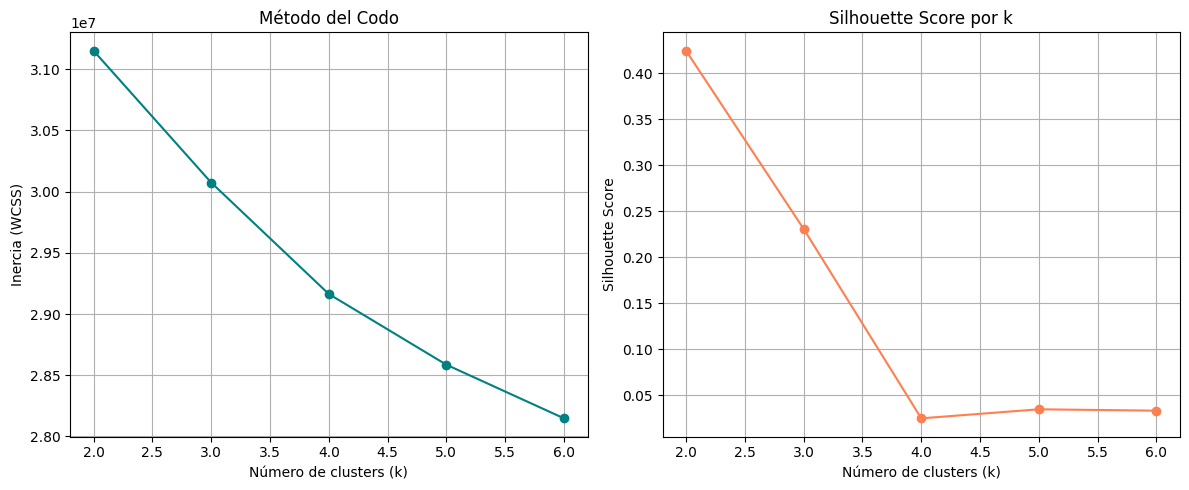

------------------------------
Mejor k según Silhouette Score: 2
------------------------------


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Definición de rangos y preparación de muestreo
k_values = range(2, 7)
inertias = []
sil_scores = []


df_sample = df_scaled.sample(n=min(10000, len(df_scaled)), random_state=42)

print("Iniciando búsqueda de k óptimo (esto puede tardar un par de minutos)...")

for k in k_values:
    print(f"Evaluando k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Ajustamos el modelo con todos los datos para la Inercia
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

    labels_sample = kmeans.predict(df_sample)
    score = silhouette_score(df_sample, labels_sample)
    sil_scores.append(score)

# 2. Visualización: Método del Codo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o", color='teal')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (WCSS)")
plt.title("Método del Codo")
plt.grid(True)

# 3. Visualización: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, sil_scores, marker="o", color='coral')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score por k")
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Selección automática de k
optimal_k = k_values[np.argmax(sil_scores)]
print("-" * 30)
print(f"Mejor k según Silhouette Score: {optimal_k}")
print("-" * 30)

In [17]:

from sklearn.cluster import KMeans

# 1. Configuración del modelo con el k óptimo detectado
# Si optimal_k no se definió correctamente, puedes forzar un valor (ej. 3)
print(f"Entrenando K-Means con k={optimal_k}...")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# 2. Ejecución del Clustering
# Usamos df_scaled que es el dataset que ya está limpio y estandarizado
cluster_labels = kmeans_final.fit_predict(df_scaled)

# 3. Asignación de etiquetas al DataFrame original (df_full)
# Aseguramos que la longitud coincida. df_full y df_scaled deben tener el mismo número de filas.
if len(cluster_labels) == len(df_full):
    df_full["CLUSTER"] = cluster_labels
    print("Clusters asignados correctamente a df_full.")
else:
    # Si hay discrepancia, reseteamos el índice de df_full para asegurar alineación
    df_full = df_full.reset_index(drop=True)
    df_full["CLUSTER"] = cluster_labels
    print("Clusters asignados tras resetear el índice de df_full.")

# 4. Verificación de la distribución de los segmentos
distribucion_clusters = df_full["CLUSTER"].value_counts().sort_index()
print("\nDistribución de clientes por Cluster:")
print(distribucion_clusters)

# 5. Visualización de los primeros resultados
columnas_vista = ["SK_ID_CURR", "CLUSTER"] + [f for f in FEATURES[:5]] # Mostramos las primeras 5 variables
df_full[columnas_vista].head()

Entrenando K-Means con k=2...
Clusters asignados correctamente a df_full.

Distribución de clientes por Cluster:
CLUSTER
0    282034
1     25477
Name: count, dtype: int64


,SK_ID_CURR,CLUSTER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,100002,0,0,202500.0,406597.5,24700.5,351000.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0


In [18]:


# 1. Asegurar que estamos usando el DataFrame con la columna CLUSTER
if 'CLUSTER' not in df_full.columns:
    print("Error: La columna CLUSTER no se encuentra en df_full. Ejecuta la asignación de labels primero.")
else:
    # 2. Cálculo de promedios por cluster
    # Seleccionamos las características clave para entender el comportamiento
    print("Calculando perfiles promedio por segmento...")
    cluster_profiles = df_full.groupby("CLUSTER")[FEATURES].mean()

    # 3. Transponer la tabla para que sea más fácil de leer (Variables en filas, Clusters en columnas)
    cluster_profiles_t = cluster_profiles.T

    print("\n--- MATRIZ DE PERFILAMIENTO (PROMEDIOS) ---")
    display(cluster_profiles_t)

    # 4. Conteo de observaciones por cluster
    print("\n--- VOLUMETRÍA POR SEGMENTO ---")
    conteo = df_full["CLUSTER"].value_counts().sort_index()
    porcentaje = df_full["CLUSTER"].value_counts(normalize=True).sort_index() * 100

    resumen_vol = pd.DataFrame({
        'Cantidad': conteo,
        'Porcentaje': porcentaje.map('{:.2f}%'.format)
    })
    display(resumen_vol)

Calculando perfiles promedio por segmento...

--- MATRIZ DE PERFILAMIENTO (PROMEDIOS) ---


CLUSTER,0,1
CNT_CHILDREN,0.420034,0.384033
AMT_INCOME_TOTAL,165003.781250,210799.593750
AMT_CREDIT,591059.500000,687216.437500
AMT_ANNUITY,26765.462891,30906.841797
AMT_GOODS_PRICE,530722.687500,623332.187500
...,...,...
IS_APPROVED__MEAN,0.749093,0.746128
IS_APPROVED__SUM,3.046884,3.016060
DAYS_LATE__MAX,16.435919,13.875869
DAYS_LATE__MEAN,-11.216193,-11.035390



--- VOLUMETRÍA POR SEGMENTO ---


,Cantidad,Porcentaje
CLUSTER,,
0,282034,91.72%
1,25477,8.28%


--- PROBABILIDAD DE INCUMPLIMIENTO POR SEGMENTO ---
Cluster 0: 8.30%
Cluster 1: 5.54%


/tmp/ipython-input-554705552.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=default_rates.index, y=default_rates.values, palette="coolwarm")


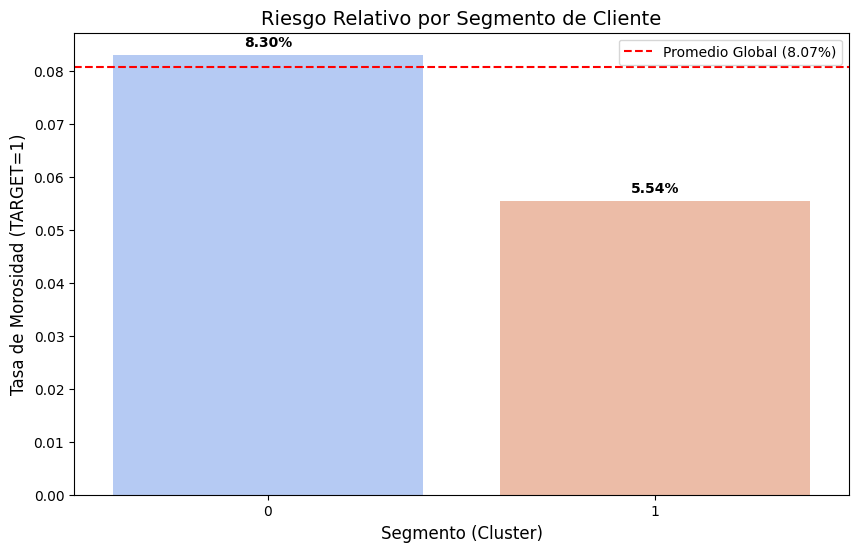

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Validación de columnas en df_full
if "TARGET" not in df_full.columns or "CLUSTER" not in df_full.columns:
    print("Error: Asegúrate de que df_full contenga las columnas 'TARGET' y 'CLUSTER'.")
else:
    # 2. Cálculo de la tasa de morosidad (Probabilidad de Default) por cluster
    # El promedio de una variable 0/1 es equivalente a la tasa porcentual
    default_rates = df_full.groupby("CLUSTER")["TARGET"].mean().sort_index()

    print("--- PROBABILIDAD DE INCUMPLIMIENTO POR SEGMENTO ---")
    for cluster, rate in default_rates.items():
        print(f"Cluster {cluster}: {rate:.2%}")

    # 3. Visualización de Riesgo
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=default_rates.index, y=default_rates.values, palette="coolwarm")

    # Añadir línea de referencia (Promedio general de morosidad)
    global_mean = df_full["TARGET"].mean()
    plt.axhline(global_mean, color='red', linestyle='--', label=f'Promedio Global ({global_mean:.2%})')

    plt.xlabel("Segmento (Cluster)", fontsize=12)
    plt.ylabel("Tasa de Morosidad (TARGET=1)", fontsize=12)
    plt.title("Riesgo Relativo por Segmento de Cliente", fontsize=14)
    plt.legend()

    # Añadir etiquetas de valor sobre las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points',
                    fontweight='bold')

    plt.show()

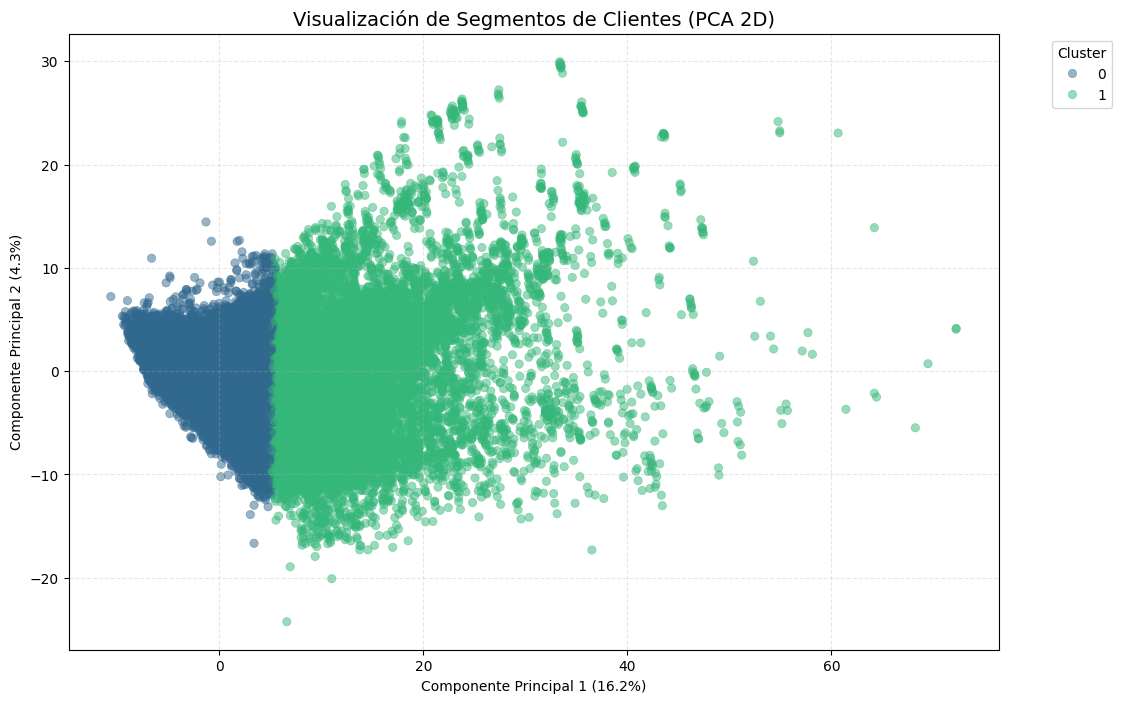

--------------------------------------------------
Varianza total explicada por los 2 componentes: 20.45%
PC1: 16.15%
PC2: 4.29%
--------------------------------------------------


In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Configuración y ejecución de PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)

# 2. Construcción del DataFrame para visualización
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

df_pca["CLUSTER"] = df_full["CLUSTER"].values

# 3. Visualización Gráfica
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="CLUSTER",
    palette="viridis",
    alpha=0.5,
    edgecolor=None
)

plt.title("Visualización de Segmentos de Clientes (PCA 2D)", fontsize=14)
plt.xlabel(f"Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 4. Análisis de varianza
print("-" * 50)
print(f"Varianza total explicada por los 2 componentes: {pca.explained_variance_ratio_.sum():.2%}")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print("-" * 50)

In [21]:

print("===== Resumen Clusters =====\n")
print("Perfiles promedio por cluster:")
display(cluster_profiles)

print("\nTasa de default (TARGET=1) por cluster:")
print(default_rates)

print(f"\nNúmero de clusters usados: {optimal_k}")
print("Varianza explicada total por PC1+PC2:",
      pca.explained_variance_ratio_.sum())


===== Resumen Clusters =====

Perfiles promedio por cluster:


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM__MEAN,AMT_CREDIT_SUM__SUM,DAYS_CREDIT__MIN,AMT_APPLICATION__MEAN,IS_APPROVED__MEAN,IS_APPROVED__SUM,DAYS_LATE__MAX,DAYS_LATE__MEAN,AMT_PAYMENT__SUM
CLUSTER,,,,,,,,,,,,,,,,,,,,,
0,0.420034,165003.78125,591059.5000,26765.462891,530722.6875,0.020039,-16029.248966,64263.898512,-4974.538574,-2989.845178,...,1.906627,362516.65625,1877739.875,-1756.939690,151310.078125,0.749093,3.046884,16.435919,-11.216193,666707.5000
1,0.384033,210799.59375,687216.4375,30906.841797,623332.1875,0.030048,-16122.745496,58846.183931,-5114.330078,-3042.437139,...,1.827255,548588.31250,2811080.250,-1821.921049,184999.125000,0.746128,3.016060,13.875869,-11.035390,815291.5625



Tasa de default (TARGET=1) por cluster:
CLUSTER
0    0.083015
1    0.055423
Name: TARGET, dtype: float64

Número de clusters usados: 2
Varianza explicada total por PC1+PC2: 0.20446205164830947


## Interpretación de resultados

Los clusters muestran diferencias claras en variables como ingresos, monto de crédito, ratios de deuda y antigüedad laboral. Al comparar la tasa de TARGET por cluster, se observan subpoblaciones con mayor probabilidad de incumplimiento.

Esto indica que K-Means identifica segmentos relevantes que el modelo supervisado podría no capturar directamente en su estructura, aportando una capa de contexto socioeconómico al análisis.

Clusters con:

- Altos ratios de crédito/ingreso: Reflejan un mayor apalancamiento financiero del cliente.

- Baja antigüedad laboral: Sugieren una menor estabilidad en la fuente de ingresos.

- Altos ANNUITY_INCOME_RATIO: Indican que una gran parte del ingreso mensual está comprometida al pago de deuda.

- Tendieron a presentar tasas de TARGET más altas, concentrando el riesgo en perfiles con menor capacidad de absorción de choques financieros.

Por otro lado, clusters con:

- Ingresos más altos: Proporcionan un mayor margen de seguridad ante imprevistos.

- Menor endeudamiento relativo: Indican una gestión del crédito más conservadora.

- Mayor estabilidad laboral: Correlacionan con una trayectoria de pagos más predecible y constante.

- Mostraron tasas de mora más bajas, consolidándose como los segmentos de mayor calidad crediticia en la cartera.

## Relación con el modelo de scoring supervisado

Los clusters obtenidos podrían mejorar el modelo de scoring crediticio mediante:

- Agregar el cluster como variable categórica (cluster_id).
- Detectar segmentos donde el modelo supervisado funciona mejor o peor.
- Identificar posibles sesgos poblacionales.
- Realizar estrategias de riesgo diferenciadas por grupo.

Por tanto, este método sí puede incorporarse en el proyecto final, ya sea como feature o como análisis
complementario de segmentación y monitoreo.
